In [35]:
%pylab inline

from sympy import Symbol, symbols, Function, Derivative, latex, exp, I, solve, lambdify, cos, sin
from IPython.display import Math, display
import numpy as np
from scipy import constants

from Electromagnetics.FourierBlochND import *
from Electromagnetics.SymExprTree import *


t, z = symbols('t z')
E, J = symbols('E J')

omega, k, c = symbols(r'\omega k c')
eps_r = symbols(r'\epsilon_r', real=True)
mu_0, eps_0 = symbols(r'\mu_0 \epsilon_0', real=True)

gamma, n_e, e, m_e, omega_p = symbols(r'\gamma n_e e m_e omega_p')
n_0 = symbols('n_0')
omega_m, k_m = symbols(r'\omega_m k_m')

EQ_E = Derivative(E, z, 2) - mu_0*eps_0*eps_r*Derivative(E, t, 2) - mu_0*Derivative(J, t, 1)
EQ_J = Derivative(J, t, 1) + gamma*J - n_e*e**2/m_e*E

display(Math('EQ_E = ' + latex(EQ_E)))
display(Math('EQ_J = ' + latex(EQ_J)))

## plasma frequency
print("Plasma frequency")
EQ_J_p = EQ_J.subs(n_e, omega_p**2*m_e/e**2)
display(Math('EQ_{Jp} = ' + latex(EQ_J_p)))


BlochFact = exp(I*omega*t-I*k*z)
#EQ_E = EQ_E.subs([(E, E*BlochFact), (J, J*BlochFact)])
#EQ_J = EQ_J.subs([(E, Es*BlochFact), (J, Js*BlochFact)])
EQ_E = symExp_replaceSymbol(EQ_E, E, E*BlochFact)
EQ_E = symExp_replaceSymbol(EQ_E, J, J*BlochFact)

EQ_J = symExp_replaceSymbol(EQ_J, E, E*BlochFact)
EQ_J = symExp_replaceSymbol(EQ_J, J, J*BlochFact)


display(Math('EQ_E = ' + latex(EQ_E)))
display(Math('EQ_J = ' + latex(EQ_J)))

harmonic = exp(n_0*I*(k_m*z))

pde_E_FB = PDEFourierSeriesND(EQ_E, [E, J], n_dim=1, harmonic=harmonic, usexyz=False)
pde_J_FB = PDEFourierSeriesND(EQ_J, [E, J, n_e], n_dim=1, harmonic=harmonic, usexyz=False)

print("replace harmonics")
EQ_E_harm = pde_E_FB.putSums()#.doit()
EQ_J_harm = pde_J_FB.putSums()#.doit()
display(Math('EQ_\\text{E harm} = ' + latex(EQ_E_harm)))
display(Math('EQ_\\text{J harm} = ' + latex(EQ_J_harm)))

print("apply derivatives")
EQ_E_harm = EQ_E_harm.doit()
EQ_J_harm = EQ_J_harm.doit()
display(Math('EQ_\\text{E harm} = ' + latex(EQ_E_harm)))
display(Math('EQ_\\text{J harm} = ' + latex(EQ_J_harm)))

print("apply convolutions")
EQ_E_harm = pde_E_FB.applyConvolutions(EQ_E_harm)
EQ_J_harm = pde_J_FB.applyConvolutions(EQ_J_harm)
display(Math('EQ_\\text{E harm} = ' + latex(EQ_E_harm)))
display(Math('EQ_\\text{J harm} = ' + latex(EQ_J_harm)))

print("apply orthogonalities")
EQ_E_harm = (pde_E_FB.applyOrthogonalities(EQ_E_harm)/BlochFact).simplify()
EQ_J_harm = (pde_J_FB.applyOrthogonalities(EQ_J_harm)/BlochFact).simplify()
display(Math('EQ_\\text{E harm} = ' + latex(EQ_E_harm)))
display(Math('EQ_\\text{J harm} = ' + latex(EQ_J_harm)))


print("harmonic variables")
E_tilde, J_tilde = pde_E_FB.varsHarm
display(Math(latex(E_tilde) + '~~~~' + latex(J_tilde)))
E_tilde, J_tilde, ne_tilde = pde_J_FB.varsHarm
display(Math(latex(E_tilde) + '~~~~' + latex(J_tilde) + '~~~~' + latex(ne_tilde)))



Populating the interactive namespace from numpy and matplotlib


/home/nima/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['solve', 'e', 'exp', 'sin', 'gamma', 'cos']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Plasma frequency


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

harmonic: 


<IPython.core.display.Math object>

harmonic: 


<IPython.core.display.Math object>

replace harmonics


<IPython.core.display.Math object>

<IPython.core.display.Math object>

apply derivatives


<IPython.core.display.Math object>

<IPython.core.display.Math object>

apply convolutions


<IPython.core.display.Math object>

<IPython.core.display.Math object>

apply orthogonalities


<IPython.core.display.Math object>

<IPython.core.display.Math object>

harmonic variables


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [55]:
## substitutions

Z_p = 1

eps_0_sub = 1.0
mu_0_sub = 1
k_m_sub = 2*np.pi/Z_p
eps_r_sub = 11.7
e_sub = 1
m_e_sub = 1
gamma_sub = 0.001

EQ_E_harm_kw = EQ_E_harm.subs([(eps_0, eps_0_sub), (mu_0, mu_0_sub), (eps_r, eps_r_sub), (k_m, k_m_sub), (gamma, gamma_sub), (e, e_sub), (m_e, m_e_sub)])
EQ_J_harm_kw = EQ_J_harm.subs([(eps_0, eps_0_sub), (mu_0, mu_0_sub), (eps_r, eps_r_sub), (k_m, k_m_sub), (gamma, gamma_sub), (e, e_sub), (m_e, m_e_sub)])


print("numerical substitution")
display(Math('EQ_\\text{E harm} = ' + latex(EQ_E_harm_kw)))
display(Math('EQ_\\text{J harm} = ' + latex(EQ_J_harm_kw)))


numerical substitution


<IPython.core.display.Math object>

<IPython.core.display.Math object>

w_p =  0.07305053684839528


/home/nima/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


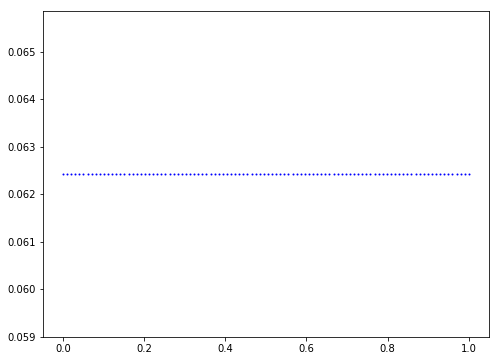

In [59]:

Ns = [64]


w_p = 0.5
print("w_p = ", w_p)
n_e_max = w_p**2*eps_r_sub*eps_0_sub
n_e_decay_rate = 0.0
n_e_z_center = Z_p/2

def ne_fun(x):
    z_ = x[0] - np.floor(x[0]/Z_p)*Z_p
    z_ += (z_ < 0)*Z_p
    assert np.all(z_>=0) and np.all(z_<Z_p)
    return n_e_max*(np.exp(-n_e_decay_rate**2*(z_ - n_e_z_center)**2))


def get_ne_harmonics(Ns):
    ne_harm_vec = pde_J_FB.getFourierCoeffs(ne_fun, [0.0], [Z_p], Ns)
    return ne_harm_vec


A_mat_list = None

def set_matrices_list(w_i, Ns):
    ne_harm_vec = get_ne_harmonics(Ns)
    
    EQ_E_fin = EQ_E_harm_kw.subs([(omega, w_i)])
    EQ_J_fin = EQ_J_harm_kw.subs([(omega, w_i)])

    expr_list = [EQ_E_fin, EQ_J_fin]
    vars = [E_tilde, J_tilde]
    pars = [ne_tilde]
    pars_vecs = [ne_harm_vec]
    eig_vars = [k]
    pde_J_FB.setupNumericalParameters(expr_list, Ns, vars, pars, pars_vecs, eig_vars)
    pde_J_FB.calculateDenseMatrices = True

    A_mat_list = pde_J_FB.orthogonalToNumpyMatrix()
    return A_mat_list

w_i = 0.1
A_mat_list = set_matrices_list(w_i, Ns)


figsize(8, 6)
x = np.linspace(0, Z_p, 100)
plot(x, ne_fun([x]), 'bo', markersize=1)
show()


In [57]:
from Electromagnetics import Misc

solver = 'hybr'
handle_overflow = True
maxiter = 400
maxfev = 400
tol = 1.0e-7
tol_abs = False

A_eqs_list = [A_mat_list]


sing_val_tol = 1.0e-5
del_norm = 1.0e-5
sig_small = 1.0e-3j

_N_pp = 4

def get_eig_points(w_i, Ns, _N_pp, A_eqs_list, vbose=False):

    _N_2 = Ns[0]#int(Ns[0]/2)

    roots_prev = []
    eig_points_k = []
    eig_points_w = []
    eig_vecs_E = []
    eig_vecs_H = []

    for j in range(-_N_pp, _N_pp+1):
        #eigvar_vals_0 = [j*w_i*np.sqrt(eps_r_sub)]
        eigvar_vals_0 = np.random.rand(1)*(2*np.pi/Z_p) - np.pi/Z_p
        if vbose:
            print(eigvar_vals_0)
        res = pde_J_FB.solveDeterminant(eigvar_vals_0, A_eqs_list, solver=solver, handle_overflow=handle_overflow, \
                                      roots_prev=roots_prev, tol=tol, maxiter=maxiter, maxfev=maxfev,\
                                      getMats=True, tol_relative=not tol_abs)

        k_i = res[0][0]

        if vbose:
            print('k_i, omega_i: ', j, (k_i, w_i), np.abs(res[1][0]))
        roots_prev.append([k_i])
        eig_points_k.append(k_i)
        eig_points_w.append(w_i)

        A_mat = res[3][0]
        rank, x_nulls, sing_vals = Misc.null(A_mat, rtol=sing_val_tol, forceRank=A_mat.shape[0]-1)
        if not rank==A_mat.shape[0]-1:
            print('rank: ', rank)
            print(sing_vals)
            assert False
        E_j = x_nulls.T[0,0:2*_N_2]/np.linalg.norm(x_nulls.T[0,0:2*_N_2])
        eig_vecs_E.append(E_j)
        if not np.linalg.norm(A_mat.dot(x_nulls))/np.linalg.norm(x_nulls)<del_norm:
            print('|Ax|=', np.linalg.norm(A_mat.dot(x_nulls)), ' |x|=', np.linalg.norm(x_nulls))
            print(res[2])


    return [eig_points_k, eig_vecs_E]

[eig_points_k, eig_vecs_E] = get_eig_points(w_i, Ns, _N_pp, A_eqs_list, vbose=True)


[0.61542005]


/home/nima/Documents/GitProjects/myPyCodes/Electromagnetics/FourierBlochND.py:1830: OptimizeWarning: Unknown solver options: maxiter, ftol
  for k in range(len(eigvar_vals)):
/home/nima/Documents/GitProjects/myPyCodes/Electromagnetics/FourierBlochND.py:1811: RuntimeWarning: overflow encountered in exp
  return dets_ri


k_i, omega_i:  -4 ((0.008727113479765417-1.6756442616958669j), 0.1) 1.7848691081464555e-11
[0.89364595]
k_i, omega_i:  -3 ((-0.00872711345237576+1.67564426167945j), 0.1) 1.5857174303551992e-11
[1.73855158]
k_i, omega_i:  -2 ((6.274458193687004+1.6756442616954936j), 0.1) 2.855674256719706e-14
[0.71645615]
k_i, omega_i:  -1 ((6.291912420754014-1.6756442616321756j), 0.1) 9.35413653811174e-13
[-2.22520279]
k_i, omega_i:  0 ((-12.557643498300711-1.6756442636528803j), 0.1) 4.4800480749137194e-14
[-3.12259471]
k_i, omega_i:  1 ((-6.291912420672381+1.6756442616974987j), 0.1) 1.2853806007807167e-17
[-1.9864797]
k_i, omega_i:  2 ((-6.274458193685938-1.6756442616967648j), 0.1) 1.8831318116875118e-18
[-1.11492662]
k_i, omega_i:  3 ((-1.1149266181652737+0j), 0.1) 1.2567548710309172e-05
|Ax|= 0.10000681870632495  |x|= 0.9999999999999999
    fjac: array([[-0.7275126 ,  0.68609432],
       [-0.68609432, -0.7275126 ]])
     fun: array([ 1.24185793e-05, -1.92929219e-06])
 message: 'The iteration is not 

/home/nima/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x
/home/nima/Documents/GitProjects/myPyCodes/Electromagnetics/FourierBlochND.py:1830: OptimizeWarning: Unknown solver options: maxiter, ftol
  for k in range(len(eigvar_vals)):


0 : w_i =  0.01
[(-0.08499995947233521+1.7035535204597136j), (0.0849999594722996-1.703553520459693j), (31.330926577245634+1.7035535185910797j), (-31.3309265529883-1.703553515821759j), (6.368185266651811-1.703553520459668j), (-18.764555962023817-1.7035535204661292j), (6.19818534770747+1.7035535204594783j), (-6.198185347693346-1.703553520483868j), (-6.368185266650796+1.7035535206034j)]
1 : w_i =  0.07862068965517241


/home/nima/Documents/GitProjects/myPyCodes/Electromagnetics/FourierBlochND.py:1811: RuntimeWarning: overflow encountered in exp
  return dets_ri


[(-0.011012579191415737+1.688883641703912j), (6.294197886302813-1.6888836416667898j), (6.27217272808038+1.6888836414012272j), (0.011012579123046871-1.6888836416669575j), (-18.83854334221246-1.6888836415112254j), (-25.14375380784767+1.6888836416749677j), (18.838543341002328+1.6888836435846817j), (-12.577383192839656+1.688883641660345j), (-6.272172727630797-1.688883640594104j)]
2 : w_i =  0.14724137931034484
|Ax|= 0.13376257460385432  |x|= 0.9999999999999998
    fjac: array([[ 0.33167275,  0.9433945 ],
       [-0.9433945 ,  0.33167275]])
     fun: array([0.85965715, 0.00099837])
 message: 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.'
    nfev: 31
     qtf: array([ 0.28610468, -0.81066423])
       r: array([-0.00335022,  0.00351725, -0.00021987])
  status: 5
 success: False
       x: array([ 0.00073465, -0.01345973])
[(0.0007346488121538651-0.013459732430304457j), (6.2771083098611005+1.6343946099558946j), (6.289262304492198-1

[(2.3825036031678946+0.00030110983982141497j), (-2.3825036031636464-0.0003011102852692585j), (8.665688910336012+0.0003011102885231806j), (-3.900681704015937+0.000301110285461496j), (-40.081615446241535-0.0003011102918591606j), (-10.183867011195527+0.0003011102856256359j), (-14.948874217673335-0.0003011098899290951j), (3.9006817040159314-0.00030111028590698997j), (-109.19665382378177-0.0003011133555313955j)]
19 : w_i =  1.313793103448276
|Ax|= 0.1128518753436265  |x|= 1.0
    fjac: array([[-0.91767546,  0.39733078],
       [-0.39733078, -0.91767546]])
     fun: array([3.08549042e-05, 1.66621395e-07])
 message: 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.'
    nfev: 15
     qtf: array([-2.82485847e-05, -1.24125075e-05])
       r: array([ 1.20687687e-01, -1.22119929e-01, -1.85449706e-07])
  status: 5
 success: False
       x: array([-2.17750257,  0.        ])
[(2.1274887476612867+0.0002678704390292388j), (-2.1274887476614808-

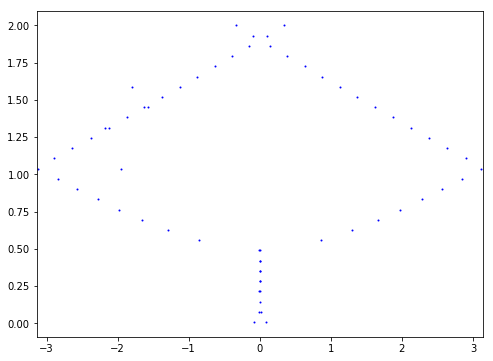

In [58]:
##get dispsion curves

w_min  = 0.01
w_max = 2.0
n_pts = 30

omega_arr = np.linspace(w_min, w_max, n_pts)

figsize(8, 6)

w_pts = []
k_pts = []

for i in range(n_pts):
    w_i = omega_arr[i]
    A_mat_list = set_matrices_list(w_i, Ns)
    A_eqs_list = [A_mat_list]
    
    print(i, ": w_i = " , w_i)
    [eig_points_k, eig_vecs_E] = get_eig_points(w_i, Ns, _N_pp, A_eqs_list, vbose=False)
    print(eig_points_k)
    eig_points_k_real = np.real(eig_points_k)
    plot(eig_points_k_real, [w_i]*len(eig_points_k), 'bo', markersize = 1)

    w_pts.extend([w_i]*len(eig_points_k))
    k_pts.extend(eig_points_k_real.tolist())
    
xlim(-np.pi/Z_p, np.pi/Z_p)
show()
